In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import numpy as np

In [22]:
dfsData = []
dfsDataLite = []
# with uproot.open('/home/mdicosta/LocalTestsO2/corrbkgs/Dplus/AO2D.root') as f:
with uproot.open('/home/mdicosta/LocalTestsO2/corrbkgs/AO2D(15).root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcanddpfullp' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2338506767090548;1', 'DF_2338506767090548/O2hfcanddplite;1']


ValueError: No objects to concatenate

In [ ]:
print(full_df.columns)

Index(['fPt', 'fEta', 'fPhi', 'fY', 'fFlagMcMatchGen', 'fFlagMcDecayChanGen',
       'fOriginMcGen'],
      dtype='object')


In [ ]:
unique_values = full_df['fFlagMcMatchGen'].unique()
print("Unique values in fFlagMcMatchGen:", unique_values)

full_df = full_df[full_df['fFlagMcMatchGen'] != 0]
print(f"Unique values in fFlagMcMatchGen after filtering: {sorted(full_df['fFlagMcMatchGen'].unique())}")
print(f"len(full_df) after filtering: {len(full_df)}")

Unique values in fFlagMcMatchGen: [ 16   1  20  18 -22   9 -14  -1  -9   4 -17 -10   7   5   3  -7  11 -12
  15  -2 -19  10  13  19  17 -16  -3   8 -11  -4 -13  -8 -20  14 -15 -18
  12   2 -23  -6  -5  21  23   6  22 -21]
Unique values in fFlagMcMatchGen after filtering: [-23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
len(full_df) after filtering: 1958


In [ ]:
unique_values = sorted(full_df['fFlagMcDecayChanGen'].unique())
print("Unique values in fFlagMcDecayChanGen:", unique_values)

Unique values in fFlagMcDecayChanGen: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [ ]:
unique_values = sorted(full_df['fFlagMcMatchGen'].unique())
print("Number of unique values in fFlagMcMatchGen:", len(unique_values))
print("Unique values in fFlagMcMatchGen:", unique_values)

Number of unique values in fFlagMcMatchGen: 46
Unique values in fFlagMcMatchGen: [-23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [ ]:
# Check if all resonant flags have been activated
particles = {
    'Dplus': [1, 4],
    'Ds': [5, 9],
    'Dstar': [10, 16],
    'Lc': [17, 20],
    'Xic': [21, 23],
}

for particle, flag_range in particles.items():
    filtered_df = full_df[
        (abs(full_df['fFlagMcMatchGen']) >= flag_range[0]) &
        (abs(full_df['fFlagMcMatchGen']) <= flag_range[1])
    ].copy()  # Ensure it's a separate copy

    unique_fin_states = filtered_df['fFlagMcMatchGen'].unique()
    unique_fin_states_sorted = sorted(unique_fin_states)  # Sort in increasing order

    unique_dec_chns = filtered_df['fFlagMcDecayChanGen'].unique()
    unique_dec_chns_sorted = sorted(unique_dec_chns)  # Sort in increasing order

    print(f"[{particle}]:\n\tNCands: {len(filtered_df)}, \n\tUnique values in fFlagMcMatchGen after filtering (sorted): {unique_fin_states_sorted} \n\tUnique values in fFlagMcDecayChanGen after filtering (sorted): {unique_dec_chns_sorted}")

[Dplus]:
	NCands: 610, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [-4, -3, -2, -1, 1, 2, 3, 4] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): [0, 1, 2, 3, 4, 5]
[Ds]:
	NCands: 289, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [-9, -8, -7, -6, -5, 5, 6, 7, 8, 9] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): [0, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[Dstar]:
	NCands: 488, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [-16, -15, -14, -13, -12, -11, -10, 10, 11, 12, 13, 14, 15, 16] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): [0, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[Lc]:
	NCands: 528, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [-20, -19, -18, -17, 17, 18, 19, 20] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): [0, 24, 25, 26]
[Xic]:
	NCands: 43, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [-23, -22, -21, 21, 22, 23] 
	Unique values in fFlag

In [ ]:
unique_values = full_df['fFlagMcDecayChanGen'].unique()
print("Unique values in fFlagMcDecayChanGen:", unique_values)

Unique values in fFlagMcDecayChanGen: [15  0 28 14 21  3 26 13  6  4  9 20  2 24 22  1 11 16 18 19  7 12 17  8
 25 23  5 10 27]


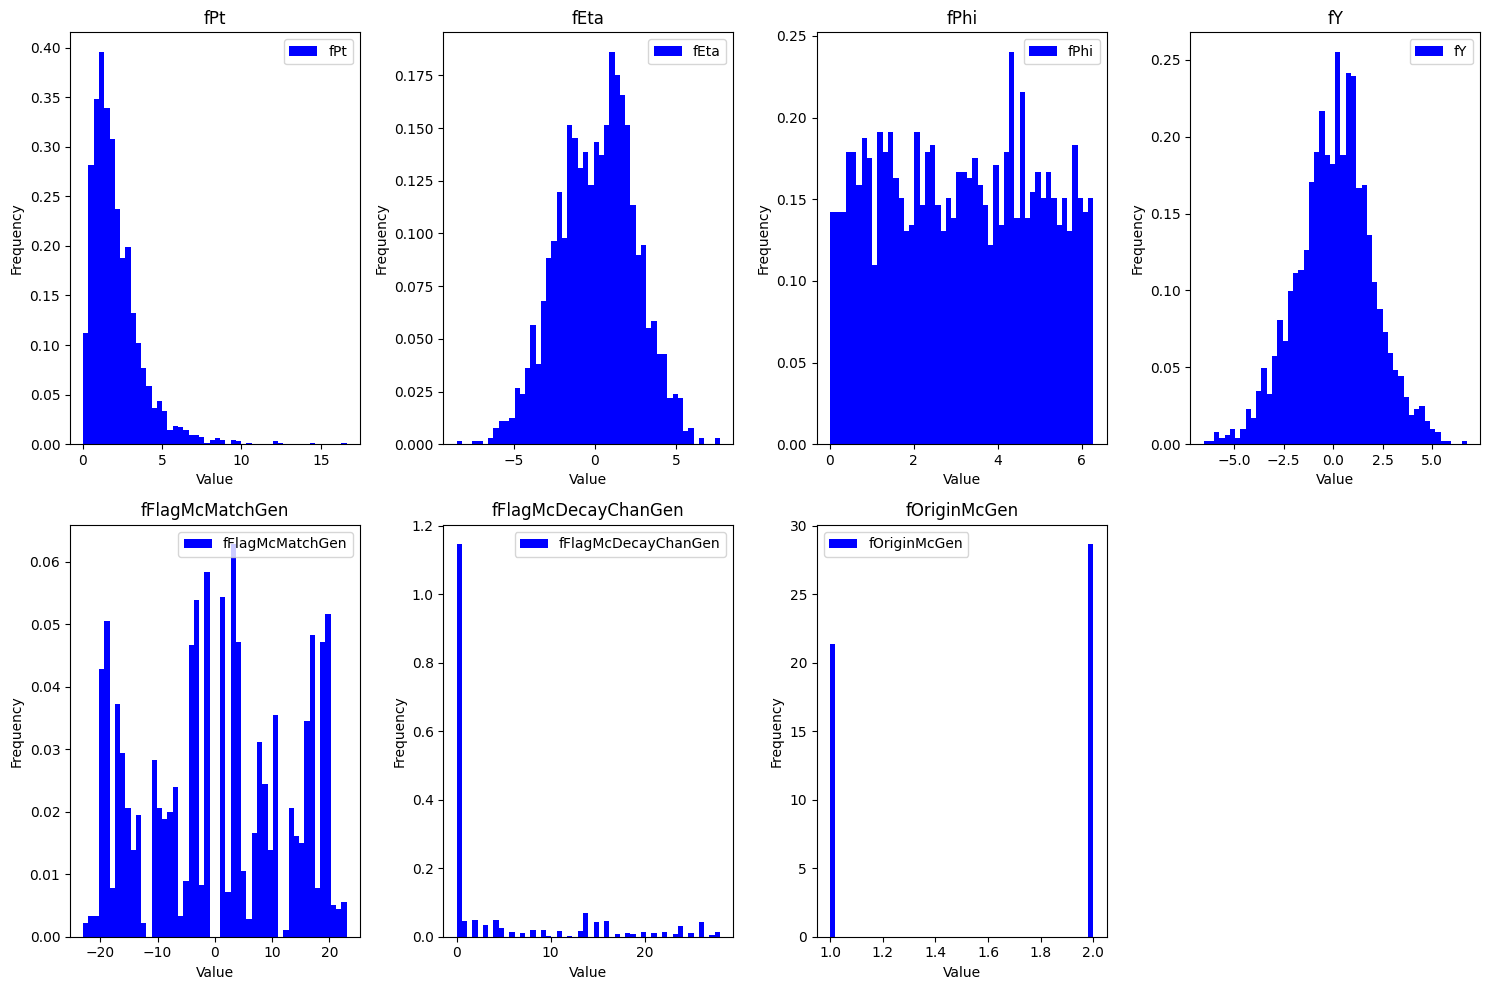

In [ ]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(full_df.columns):
    data = full_df[column]
    finite_data = data[np.isfinite(data)]  # Filter out NaN and inf

    if len(finite_data) == 0:
        axes[i].set_visible(False)
        continue

    axes[i].hist(finite_data, bins=50, density=True, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend([column])

# Hide any unused axes
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
